In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/weather-plot', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/weather-plot', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1.1 读取多个时次的模式预报数据 TEMP

In [3]:
%time
directory850 = "ECMWF_HR/WIND/850"
directory500 = "ECMWF_HR/WIND/500"
fhours = np.arange(0, 168, 24)
filenames = ['22062420.'+'%03d'%(fhour) for fhour in fhours]
Wind850 = get_model_grids(directory850, filenames, varname='WIND', varattrs={'long_name':'850hPa Wind', 'units':'m/s'}, cache=False)
Wind500 = get_model_grids(directory500, filenames, varname='WIND', varattrs={'long_name':'500hPa Wind', 'units':'m/s'}, cache=False)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.29 µs


In [4]:
Wind850

<xarray.Dataset>
Dimensions:                  (time: 7, level: 1, lat: 281, lon: 361)
Coordinates:
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * level                    (level) float32 850.0
  * time                     (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
    forecast_reference_time  datetime64[ns] 2022-06-24T20:00:00
    forecast_period          (time) float64 0.0 24.0 48.0 72.0 96.0 120.0 144.0
Data variables:
    speed                    (time, level, lat, lon) float32 15.17 ... 1.869
    angle                    (time, level, lat, lon) float32 115.7 ... 64.33
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

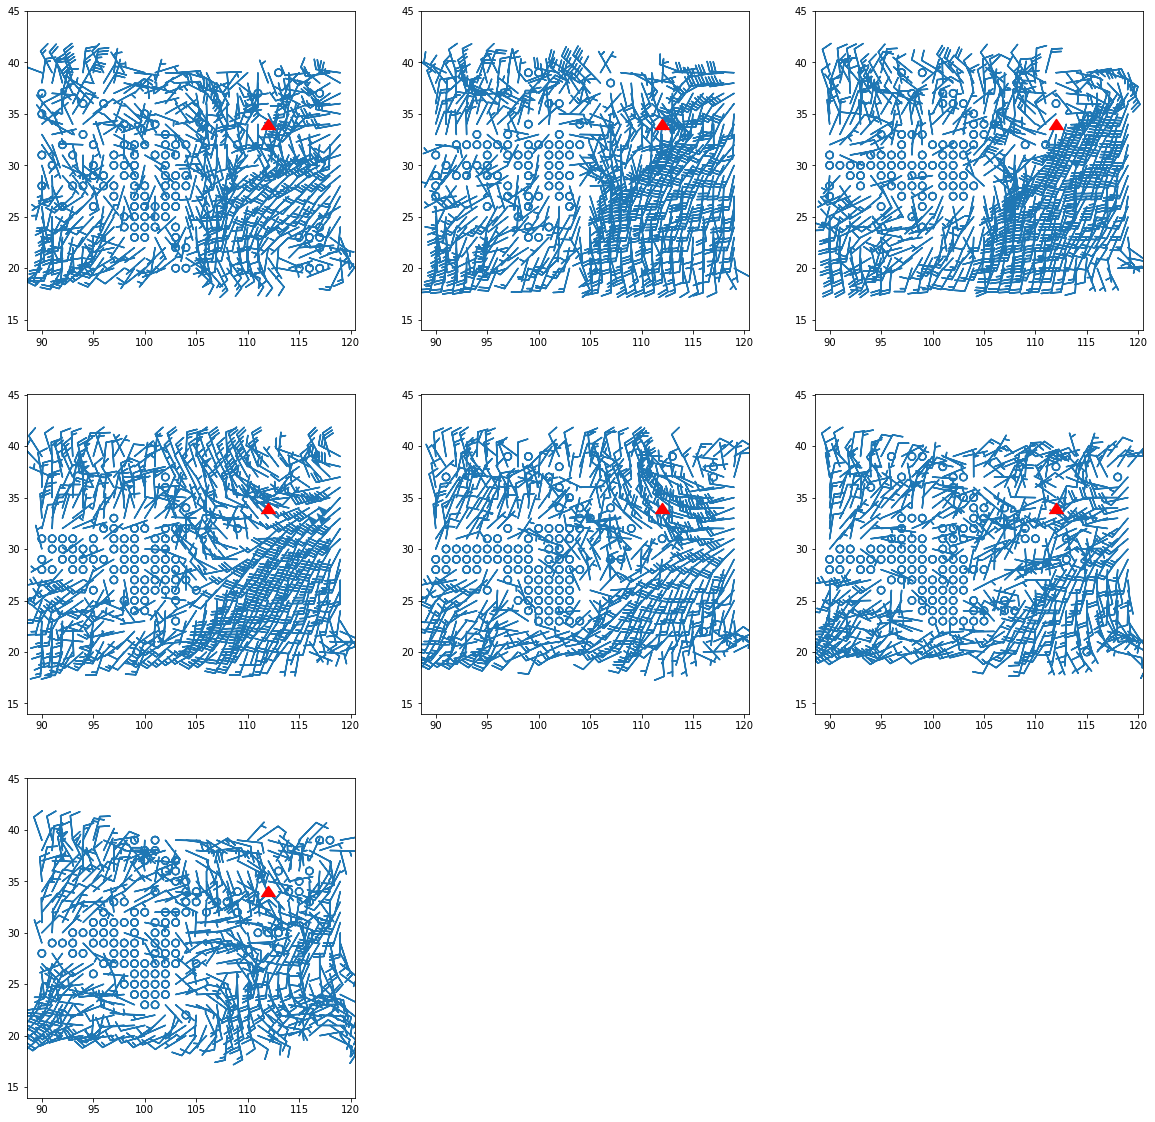

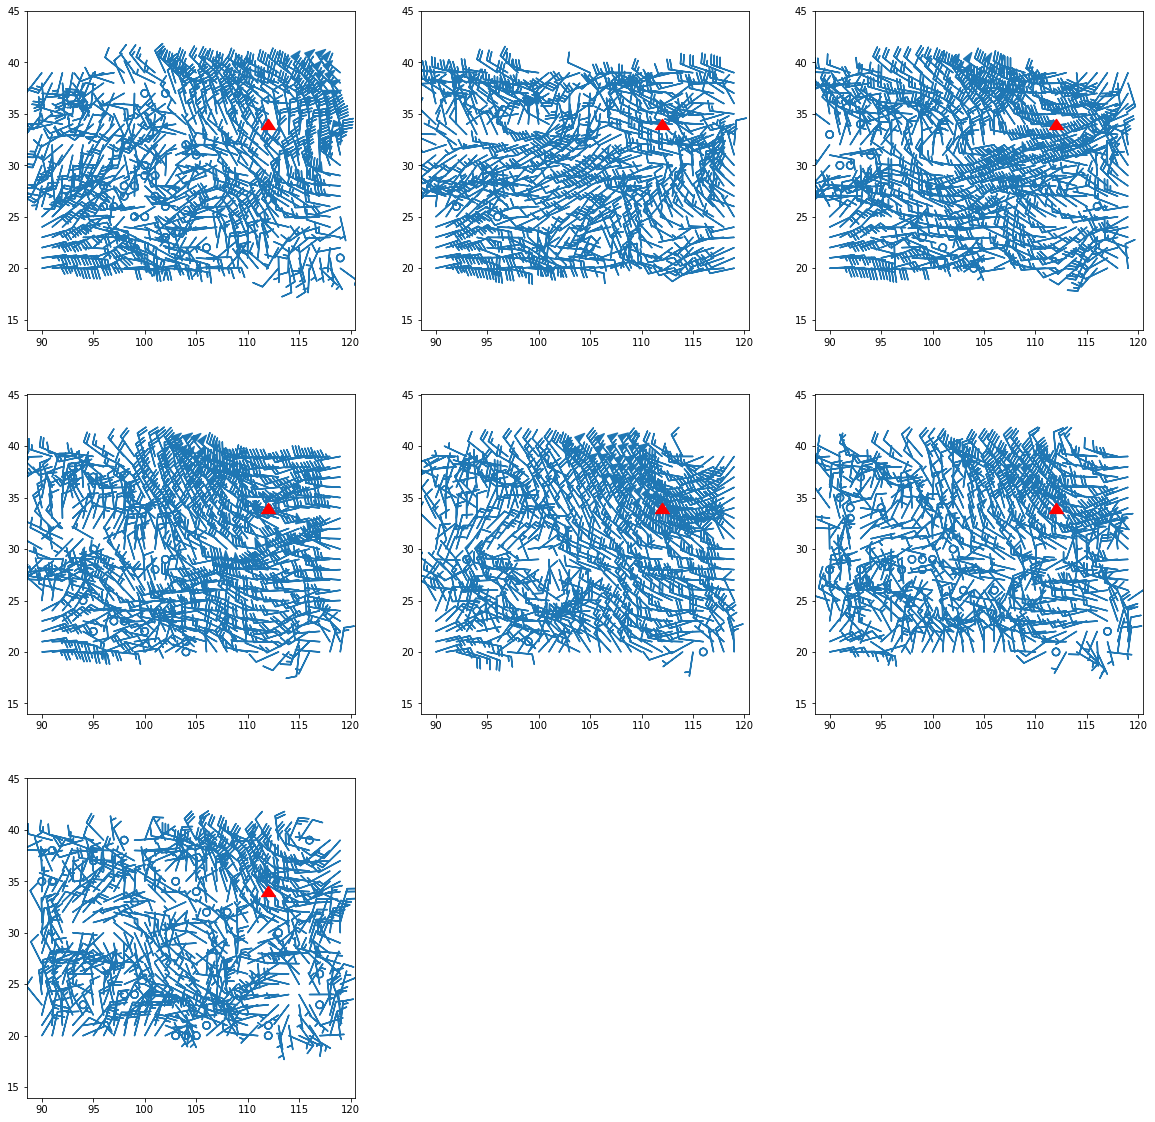

In [5]:
# 绘制图像
left = 90
right=120
top = 40
bottom = 20

Wind850 = Wind850.isel(level=0).sel(lon=np.arange(left,right,1),lat=np.arange(bottom,top,1), method="nearest")

fig = plt.figure(figsize=(20, 20))

index = 0
for row in range(0,100):
    for col in range(0, 3):
        if index >= Wind850.sizes['time']:
            break

        latestEC = Wind850.isel(time=index)

        angle = (270 - latestEC.angle) * np.pi / 180

        ecU850 = latestEC.speed * np.cos(angle)
        ecV850 = latestEC.speed * np.sin(angle)

        index = index + 1
        ax = fig.add_subplot(3,3, index)

        ax.barbs(latestEC.lon, latestEC.lat, ecU850, ecV850, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)
        ax.axis('equal')
        ax.scatter(112, 34.5, s=200, c='red', marker=6)


Wind500 = Wind500.isel(level=0).sel(lon=np.arange(left,right,1),lat=np.arange(bottom,top,1), method="nearest")

fig = plt.figure(figsize=(20, 20))

index = 0
for row in range(0,100):
    for col in range(0, 3):
        if index >= Wind500.sizes['time']:
            break

        latestEC = Wind500.isel(time=index)

        angle = (270 - latestEC.angle) * np.pi / 180

        ecU500 = latestEC.speed * np.cos(angle)
        ecV500 = latestEC.speed * np.sin(angle)

        index = index + 1
        ax = fig.add_subplot(3,3, index)
        ax.barbs(latestEC.lon, latestEC.lat, ecU500 - ecU850, ecV500 - ecV850, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)
        ax.axis('equal')
        ax.scatter(112, 34.5, s=200, c='red', marker=6)

        

## 1.2 High Wind Plot

In [6]:
level = '700'


In [7]:
plot850 = get_station_data(f"UPPER_AIR/PLOT/{level}", "20220625080000.000", dropna=True, cache=False)

plot850 = plot850.dropna(how='any')
plot850 = plot850[(bottom <= plot850['lat']) & (plot850['lat'] <= top) &
                    (left <= plot850['lon']) & (plot850['lon'] <= right)]
                    
plot850

,ID,lon,lat,Alt,Dewpoint_depression,Geopotential_hight,Temp,Wind_angle,Wind_speed,time
15,59431,108.550003,22.780001,153.300003,9.5,313.000000,12.2,234.0,4.9,2022-06-25 08:00:00
22,58424,116.970001,30.620001,63.200001,6.8,312.200012,11.8,265.0,7.0,2022-06-25 08:00:00
41,57447,109.470001,30.290001,455.600006,0.5,309.799988,11.6,221.0,7.4,2022-06-25 08:00:00
47,57461,111.360001,30.740000,257.700012,4.2,308.500000,10.6,231.0,6.6,2022-06-25 08:00:00
60,57494,114.050003,30.600000,23.600000,3.1,310.700012,11.4,240.0,9.3,2022-06-25 08:00:00
...,...,...,...,...,...,...,...,...,...,...
423,57245,109.029999,32.720001,291.700012,1.5,308.500000,11.3,222.0,6.0,2022-06-25 08:00:00
435,59316,116.680000,23.379999,3.500000,5.1,313.899994,10.8,196.0,1.4,2022-06-25 08:00:00
436,56247,99.110001,30.000000,2581.800049,5.4,306.100006,15.3,69.0,3.2,2022-06-25 08:00:00
468,57328,107.510002,31.209999,344.899994,0.3,308.100006,11.3,216.0,9.8,2022-06-25 08:00:00


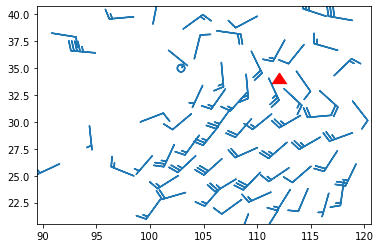

In [8]:
# plot:
angle = (270 - plot850.Wind_angle) * np.pi / 180

U = plot850.Wind_speed * np.cos(angle)
V = plot850.Wind_speed * np.sin(angle)

# plot:
fig, ax = plt.subplots()

wb = ax.barbs(plot850.lon, plot850.lat, U, V, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)

# ax.set(xlim=(0, 4.5), ylim=(0, 4.5))


ax.scatter(112, 34.5, s=200, c='red', marker=6)

# fig.colorbar(wb, ax=ax)

In [9]:
plot850[plot850['ID']==57083]
plot850

,ID,lon,lat,Alt,Dewpoint_depression,Geopotential_hight,Temp,Wind_angle,Wind_speed,time
15,59431,108.550003,22.780001,153.300003,9.5,313.000000,12.2,234.0,4.9,2022-06-25 08:00:00
22,58424,116.970001,30.620001,63.200001,6.8,312.200012,11.8,265.0,7.0,2022-06-25 08:00:00
41,57447,109.470001,30.290001,455.600006,0.5,309.799988,11.6,221.0,7.4,2022-06-25 08:00:00
47,57461,111.360001,30.740000,257.700012,4.2,308.500000,10.6,231.0,6.6,2022-06-25 08:00:00
60,57494,114.050003,30.600000,23.600000,3.1,310.700012,11.4,240.0,9.3,2022-06-25 08:00:00
...,...,...,...,...,...,...,...,...,...,...
423,57245,109.029999,32.720001,291.700012,1.5,308.500000,11.3,222.0,6.0,2022-06-25 08:00:00
435,59316,116.680000,23.379999,3.500000,5.1,313.899994,10.8,196.0,1.4,2022-06-25 08:00:00
436,56247,99.110001,30.000000,2581.800049,5.4,306.100006,15.3,69.0,3.2,2022-06-25 08:00:00
468,57328,107.510002,31.209999,344.899994,0.3,308.100006,11.3,216.0,9.8,2022-06-25 08:00:00


## 1.3 Draw Wind Diff

In [10]:
dti = pd.date_range("2022-06-24 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")


directory850 = f"ECMWF_HR/WIND/{level}"
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

Wind850 = get_model_grids(directory850, filenames, varname='WIND', varattrs={'long_name':'850hPa Wind', 'units':'m/s'}, cache=False)

Wind850

2022-06-24 20:00:00    22062420.012
2022-06-24 08:00:00    22062408.024
2022-06-23 20:00:00    22062320.036
2022-06-23 08:00:00    22062308.048
2022-06-22 20:00:00    22062220.060
2022-06-22 08:00:00    22062208.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, level: 1, lat: 281, lon: 361)
Coordinates:
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * level                    (level) float32 700.0
  * time                     (time) datetime64[ns] 2022-06-25T08:00:00 ... 20...
    forecast_reference_time  (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    speed                    (time, level, lat, lon) float32 10.83 ... 8.357
    angle                    (time, level, lat, lon) float32 87.09 ... 315.0
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

/home/x711/anaconda3/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x711/anaconda3/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/x711/anaconda3/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x711/anaconda3/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will rai

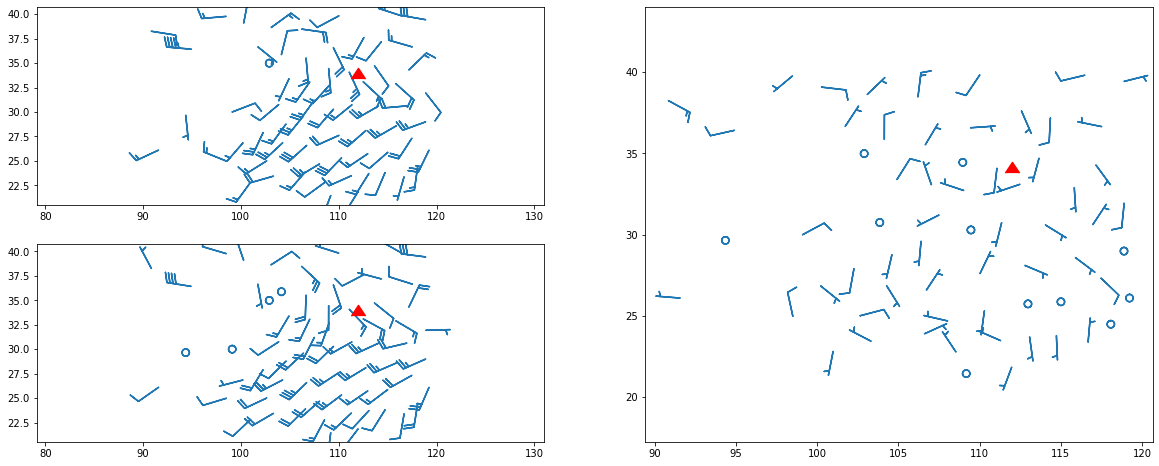

In [11]:
latestEC = Wind850.isel(time=0).isel(level=0)

angle = (270 - latestEC.angle) * np.pi / 180

ecU = latestEC.speed * np.cos(angle)
ecV = latestEC.speed * np.sin(angle)

#print(ecU.interp(lon=112,lat=34.5).item())

interpU = []
interpV = []
for index in range(0, plot850.shape[0]):
    item = plot850[index:index+1]
    interpU.append(ecU.interp(lon=item.lon,lat=item.lat).item())
    interpV.append(ecV.interp(lon=item.lon,lat=item.lat).item())

#print(U - interpU)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.barbs(plot850.lon, plot850.lat, U, V, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)
ax0.axis('equal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.barbs(plot850.lon, plot850.lat, interpU, interpV, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)
ax1.axis('equal')

ax2 = fig.add_subplot(gs[:, 1])
wb = ax2.barbs(plot850.lon, plot850.lat, U - interpU, V - interpV, barb_increments={'half':2, 'full':4, 'flag':20}, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)
# ax.set(xlim=(0, 4.5), ylim=(0, 4.5))
ax2.axis('equal')

ax0.scatter(112, 34.5, s=200, c='red', marker=6)
ax1.scatter(112, 34.5, s=200, c='red', marker=6)
ax2.scatter(112, 34.5, s=200, c='red', marker=6)

# fig.colorbar(wb, ax=ax)